In [506]:
import torch
torch.__version__

'1.9.0+cu111'

In [505]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from torch.autograd import Variable

## PyTorch로 첫 번째 신경망 만들기

1. **데이터 준비** : `get_data()` 함수는 입력과 출력 데이터로 구성된 Tensor 배열을 제공

2. **학습 파라미터 생성** : `get_weights` 함수는 임의의 수로 채워진 Tensor를 제공

3. **네트워크 모델** : `simple_network()`는 선형 규칙을 적용하고, 가중치에 입력 데이터를 곱하고, Bias 항
$$y = Wx + b$$
을 더하여 입력 데이터에 대한 출력을 생성

4. **오차** : `loss_fn()` 함수는 모델 정확도에 대한 정보를 제공

5. **옵티마이저** : `optimize()` 함수는 초기에 생성된 임의의 가중치를 조정하여 모델이 목표 값을 정확하게 계산하도록 함

In [466]:
# 학습 데이터
def get_data():
    train_X = np.asarray([3.3, 4.4, 5.5 , 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                          7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
    train_Y = np.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                          2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])

    dtype = torch.FloatTensor

    X = Variable(torch.from_numpy(train_X).type(dtype), requires_grad = False).view(17, 1)
    y = Variable(torch.from_numpy(train_Y).type(dtype), requires_grad = False)

    return X, y

def plot_variable(X, y, z = '', **kwargs):
    l = []
    for a in [X, y]:
        l.append(a.data.numpy())
    plt.plot(l[0], l[1], z, **kwargs)

def get_weights():
    w = Variable(torch.randn(1), requires_grad = True)
    b = Variable(torch.randn(1), requires_grad = True)

    return w, b

def simple_network(X):
    y_pred = torch.matmul(X, w) + b

    return y_pred

def loss_fn(y, y_pred):
    loss = (y_pred - y).pow(2).sum()
    for param in [w, b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()

    return loss.data

def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

learning_rate = 1e-4

In [467]:
X, y = get_data() # X : 훈련 데이터, y : 목표 변수
w, b = get_weights() # w, b : 학습 파라미터

for i in range(500):
    y_pred = simple_network(X) # wx + b 연산 함수
    loss = loss_fn(y, y_pred) # y와 y_pred의 차의 제곱 합(MSE - Mean Squared Error)
    if i % 50 == 0:
        print(loss)
    optimize(learning_rate) # 오차를 최소화하기 위해 w, b 파라미터 조정

tensor(4318.1475)
tensor(8.9064)
tensor(8.6518)
tensor(8.4077)
tensor(8.1735)
tensor(7.9487)
tensor(7.7331)
tensor(7.5261)
tensor(7.3276)
tensor(7.1370)


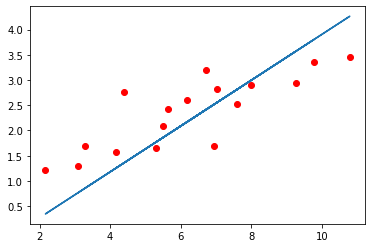

In [468]:
X_numpy = X.data.numpy()
plot_variable(X, y, 'ro')
plot_variable(X, y_pred, label = 'Fitted line')

## Tensor 소개

##### 스칼라(0차원 텐서)

In [469]:
x = torch.tensor(10)
print(x)
print(x.size())
print(x.dim())

tensor(10)
torch.Size([])
0


##### 스칼라(1차원 텐서)

In [470]:
y = torch.rand(10)
print(y)
print(y.size())
print(y.dim())

tensor([0.4550, 0.8563, 0.4437, 0.1360, 0.3782, 0.6644, 0.0482, 0.1272, 0.9374,
        0.2080])
torch.Size([10])
1


##### 벡터(1차원 텐서)

In [471]:
temp = torch.FloatTensor([23, 24, 24.5, 26, 27.2, 23.0])
print(temp)
print(temp.size())
print(temp.dim())

tensor([23.0000, 24.0000, 24.5000, 26.0000, 27.2000, 23.0000])
torch.Size([6])
1


##### 행렬(2차원 텐서)

In [472]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.data.shape)

(506, 13)


In [473]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [474]:
boston_tensor = torch.from_numpy(boston.data)
boston_tensor.size()

torch.Size([506, 13])

In [475]:
boston_tensor[:2]

tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01, 6.5750e+00,
         6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02, 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01, 6.4210e+00,
         7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02, 1.7800e+01, 3.9690e+02,
         9.1400e+00]], dtype=torch.float64)

첫 번째 차원에서, 0번 인덱스 값부터 1번 인덱스 값을 출력 (1행부터 2행까지 출력)

In [476]:
boston_tensor[:10, :5]

tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01],
        [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01],
        [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01],
        [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01],
        [8.8290e-02, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01],
        [1.4455e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01],
        [2.1124e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01],
        [1.7004e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01]],
       dtype=torch.float64)

첫 번째 차원에서, 0번 인덱스 값부터 9번 인덱스 값을 출력<br/>
두 번째 차원에서, 0번 인덱스 값부터 4번 인덱스 값을 출력<br/>
(1행부터 10행, 1열부터 5열까지 출력)

##### 3D Tensor

In [477]:
from PIL import Image

panda = np.array(Image.open('../images/B09301_03_12.jpg').resize((224, 224)))
panda_tensor = torch.from_numpy(panda)
panda_tensor.size()

torch.Size([224, 224, 3])

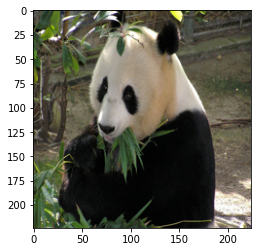

In [478]:
plt.imshow(panda)

##### Tensor Slicing(텐서 자르기)

In [479]:
sales = torch.FloatTensor([1000.0, 323.2, 333.4, 444.5, 1000.0, 323.2, 333.4, 444.5])

In [480]:
sales[:5]

tensor([1000.0000,  323.2000,  333.4000,  444.5000, 1000.0000])

첫 번째 차원에서, 0번 인덱스 값부터 4번 인덱스 값을 출력 (1행부터 5행까지 출력)

In [481]:
sales[:-5]

tensor([1000.0000,  323.2000,  333.4000])

첫 번째 차원에서, 0번 인덱스 값부터 3번 인덱스 값을 출력 (1행부터 3행까지 출력)

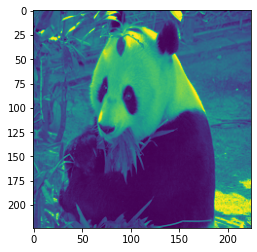

In [482]:
plt.imshow(panda_tensor[:, :, 0].numpy())

RGB의 첫 번째 채널을 출력

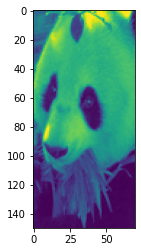

In [483]:
plt.imshow(panda_tensor[25:175, 60:130, 0].numpy())

판다 이미지의 얼굴 영역을 지정해서 자른 Tensor 객체 출력

##### Tensor에서 특정 요소 가져오기

In [484]:
sales = torch.eye(3, 3)
sales[0, 1]

tensor(0.)

`torch.eye(shape)`는 대각 행렬을 만들고, 대각선 요소를 1로 채운다.

##### 4D Tensor

In [485]:
from glob import glob

# 아래 파일 경로에서 고양이 이미지 가져오기
data_path = '../images/dogs-vs-cats-redux-kernels-edition/train/cats/'
cats = glob(data_path + '*jpg')

# 이미지를 numpy 배열로 변환
cat_imgs = np.array([np.array(Image.open(cat).resize((224, 224))) for cat in cats[:64]])
cat_imgs = cat_imgs.reshape(-1, 224, 224, 3)
cat_tensors = torch.from_numpy(cat_imgs)
cat_tensors.size()

torch.Size([64, 224, 224, 3])

##### Tensor 덧셈 연산과 곱셈 연산

In [486]:
# Tensor 덧셈 방법
a = torch.rand(2, 2)
print("a = {}".format(a))

b = torch.rand(2, 2)
print("b = {}".format(b))

c = a + b
print("c = {}".format(c))

d = torch.add(a, b)
print("d = {}".format(d))

# 인라인 덧셈
e = a.add_(5)
print("e = {}".format(e))

a = tensor([[0.3857, 0.3271],
        [0.1213, 0.4530]])
b = tensor([[0.8031, 0.4454],
        [0.0182, 0.7893]])
c = tensor([[1.1888, 0.7725],
        [0.1395, 1.2424]])
d = tensor([[1.1888, 0.7725],
        [0.1395, 1.2424]])
e = tensor([[5.3857, 5.3271],
        [5.1213, 5.4530]])


In [487]:
# Tensor 곱셈 방법
f = a * b
print("f = {}".format(f))

g = a.mul(b)
print("g = {}".format(g))

# 인라인 곱셈
h = a.mul_(b)
print("h = {}".format(h))

f = tensor([[4.3251, 2.3727],
        [0.0933, 4.3043]])
g = tensor([[4.3251, 2.3727],
        [0.0933, 4.3043]])
h = tensor([[4.3251, 2.3727],
        [0.0933, 4.3043]])


##### CPU와 GPU 연산 비교

In [488]:
%%time

# CPU 연산
a = torch.rand(10000, 10000)
b = torch.rand(10000, 10000)

a.matmul(b)

Wall time: 3.8 s


tensor([[2492.7903, 2528.4265, 2508.5540,  ..., 2532.9458, 2525.8848,
         2497.0095],
        [2462.3535, 2499.5984, 2466.2026,  ..., 2514.0791, 2506.9219,
         2459.7002],
        [2487.2539, 2520.1592, 2495.5342,  ..., 2534.1572, 2513.8450,
         2487.3162],
        ...,
        [2497.1199, 2530.8579, 2506.0305,  ..., 2527.8591, 2537.8545,
         2490.0151],
        [2476.8740, 2487.8899, 2472.7837,  ..., 2505.0388, 2491.3914,
         2454.0437],
        [2476.0344, 2502.8762, 2486.8118,  ..., 2508.1724, 2499.9885,
         2468.3850]])

In [489]:
%%time

# GPU 연산 (CPU용 텐서 객체를 GPU 텐서로 변환)
from torch import cuda

if cuda.is_available():
    a = a.cuda()
    b = b.cuda()
    c = a.matmul(b)

Wall time: 150 ms


##### Variables

In [490]:
x = Variable(torch.ones(2, 2), requires_grad = True)
y = x.mean()

print(x)
print(y)
print(y.backward())
print(x.grad)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor(1., grad_fn=<MeanBackward0>)
None
tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])


In [491]:
print(x.grad_fn)

None


In [492]:
x.data

tensor([[1., 1.],
        [1., 1.]])

In [493]:
y.grad_fn

##### 신경망에 사용할 데이터 생성

In [494]:
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

    dtype = torch.FloatTensor

    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad = False).view(17, 1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad = False)

    return X, y

함수 `get_data`가 생성하는 변수 x와 y의 크기는 (17, 1), (17) 이다.

##### 학습 파라미터 생성

In [495]:
def get_weights():
    w = Variable(torch.randn(1), requires_grad = True)
    b = Variable(torch.randn(1), requires_grad = True)

    return w, b

학습 파라미터 : w, b

고정 파라미터 : X, y

`torch.randn` 함수는 매개변수로 설정된 형상의 임의의 값을 생성

##### 훈련 데이터셋과 신경망이 학습할 모델 시각화

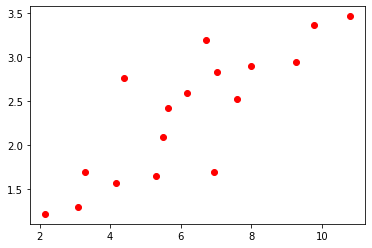

In [496]:
X, y = get_data()
plot_variable(X, y, 'ro')

##### 신경망 구현 (저수준 함수)

In [497]:
def simple_network(X):
    y_pred = torch.matmul(w, X) + b

    return y_pred

w와 X의 행렬 곱을 계산하고, 그 결과에 b를 더하면 예측값 y가 나온다.

##### 파이토치 신경망 구현 (고수준 추상화 컴포넌트)

In [498]:
import torch.nn as nn

f = nn.Linear(17, 1)
f

Linear(in_features=17, out_features=1, bias=True)

##### 오차 함수 구현

In [499]:
def loss_fn(y, y_pred):
    loss = (y_pred - y).pow(2).sum()
    for param in [w, b]:
        if not param.grad is None: param.grad.data.zero_() # 기울기를 "0"으로 만듦(오차 함수를 한 번 이상 호출해야 할 때)
    loss.backoard() # backward는 학습 파라미터 w, b의 변화 정도를 기울기로 계산

    return loss.data[0]

예측값 y와 실제값 y 사이의 차이를 구하고, 그 결과를 제곱한다.

SSE(Sum of Squared Error) 오차 함수(Loss Function)는 예측값이 실제값과 얼마나 가까운지 평가한다.

##### 옵티마이저 구현

In [500]:
def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

Learning rate는 Hyper-parameter로, 학습 파라미터(w, b)의 값을 조정할 때 사용하는 기울기의 적용 비율

## Data Loading

##### Dataset Class

In [501]:
from torch.utils.data import Dataset, DataLoader

class DogsAndCatsDataset(Dataset):
    # 초기화 작업
    def __init__(self,):
        pass

    # 데이터셋의 최대 요소 수 반환
    def __len__(self):
        pass

    # 데이터셋에 idx번 째 해당 요소 반환
    def __getitem__(self, idx):
        pass

In [502]:
class DogsAndCatsDataset(Dataset):
    def __init__(self, root_dir = '../images/dogs-vs-cats-redux-kernels-edition/train/', size = (224, 224)):
        self.files = glob(root_dir)
        self.size = size

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img = np.asarray(Image.open(self.files[idx]).resize(self.size))
        label = self.files[idx].split('/')[-2]

        return img, label

#### DataLoader Class

In [503]:
dataloader = DataLoader(DogsAndCatsDataset, batch_size = 32, num_workers = 2)
for img, label in dataloader:
    pass